In [14]:
import numpy as np
from physionet2023.modeling.scoringUtil import roc_auc_score, compute_challenge_score

In [16]:
good_labels = np.load("../cache/labels.good.npy")
good_preds = np.load("../cache/preds.good.npy")

print(roc_auc_score(good_labels, good_preds))
print(compute_challenge_score(good_labels, good_preds))

0.7163029525032093
0.4146341463414634


In [17]:
bad_labels = np.load("../cache/labels.bad.npy")
bad_preds = np.load("../cache/preds.bad.npy")

print(roc_auc_score(bad_labels, bad_preds))
print(compute_challenge_score(bad_labels, bad_preds))

0.7341490545050056
0.12903225806451613


In [20]:
print(f"Good % positive: {sum(good_labels) / len(good_labels)}")
print(f"Bad % positive: {sum(bad_labels) / len(bad_labels)}")

Good % positive: 0.6833333333333333
Bad % positive: 0.5166666666666667


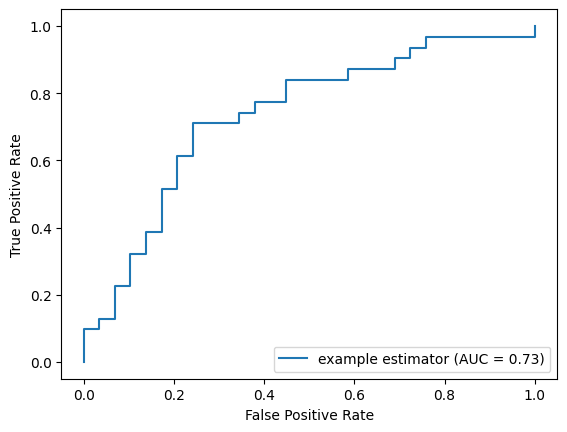

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(bad_labels, bad_preds)
roc_auc = metrics.auc(fpr, tpr)
display_bad = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display_bad.plot()

plt.show()

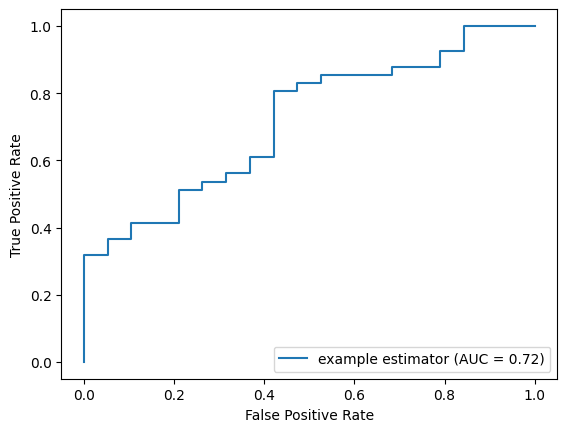

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(good_labels, good_preds)
roc_auc = metrics.auc(fpr, tpr)
display_good = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display_good.plot()

plt.show()

(array([ 5.,  8., 13.,  7.,  2.,  3.,  5.,  8.,  2.,  7.]),
 array([0.54527736, 0.57945263, 0.61362791, 0.64780319, 0.68197846,
        0.71615374, 0.75032908, 0.78450435, 0.81867963, 0.85285491,
        0.88703018]),
 <BarContainer object of 10 artists>)

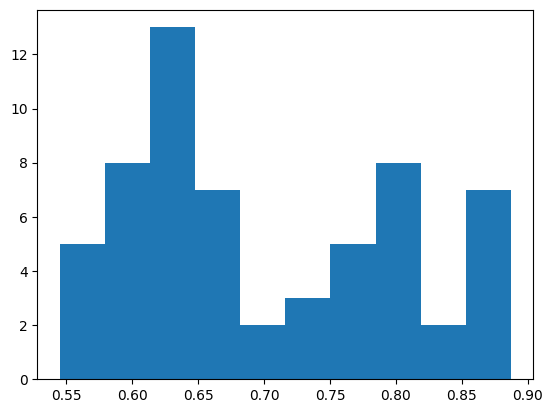

In [37]:
plt.hist(bad_preds)

(array([10.,  4., 11.,  9.,  6.,  5.,  1.,  4.,  4.,  6.]),
 array([0.46912038, 0.5145784 , 0.56003636, 0.60549438, 0.6509524 ,
        0.69641042, 0.74186838, 0.7873264 , 0.83278441, 0.87824237,
        0.92370039]),
 <BarContainer object of 10 artists>)

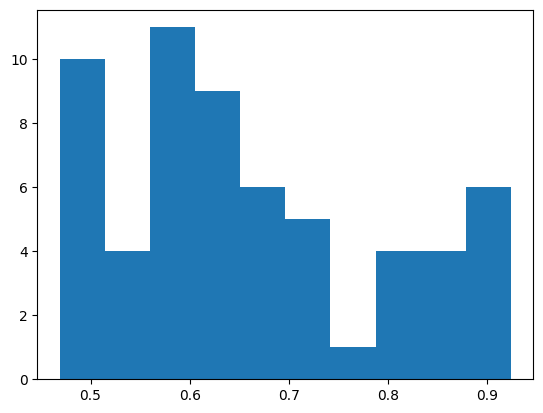

In [38]:
plt.hist(good_preds)

In [57]:
def adjust_preds(p):
    base = 100
    return np.where(p < p.mean(), p * 0.5, p)

compute_challenge_score(bad_labels, adjust_preds(bad_preds))
#adjust_preds(bad_preds)

0.12903225806451613

In [46]:
bad_preds

array([0.64780986, 0.7905525 , 0.6619493 , 0.8088683 , 0.6123541 ,
       0.7604199 , 0.8221469 , 0.66829085, 0.6496069 , 0.5853185 ,
       0.8652855 , 0.6348672 , 0.8823254 , 0.6061636 , 0.63551766,
       0.6085545 , 0.8689276 , 0.74655753, 0.6623365 , 0.6162505 ,
       0.7336493 , 0.87542236, 0.6199376 , 0.5795429 , 0.66696054,
       0.7850328 , 0.640344  , 0.7605245 , 0.5988077 , 0.8718204 ,
       0.778072  , 0.7613961 , 0.6195181 , 0.8870302 , 0.6196869 ,
       0.7737883 , 0.6148101 , 0.798389  , 0.62103325, 0.619419  ,
       0.6219385 , 0.61741006, 0.6480201 , 0.8092022 , 0.57728416,
       0.5500782 , 0.57157296, 0.57989   , 0.7871409 , 0.7247089 ,
       0.5930692 , 0.6829093 , 0.8501392 , 0.5581981 , 0.54527736,
       0.8535445 , 0.78912497, 0.6217167 , 0.7976736 , 0.68491733],
      dtype=float32)